In [1]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries, \
                              add_subplotlabels # set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 3 & tutorial name: reactive-silicon-dioxide
figures will be saved in /docs/sphinx/source/tutorials/figures/level3/reactive-silicon-dioxide/


In [3]:
log = lammps_logfile.File("log.lammps")
step = log.get("Step")
qSi = log.get("v_qSi")
qO = log.get("v_qO")
Volume = log.get("Volume")
timestep = 0.5
time = step*timestep

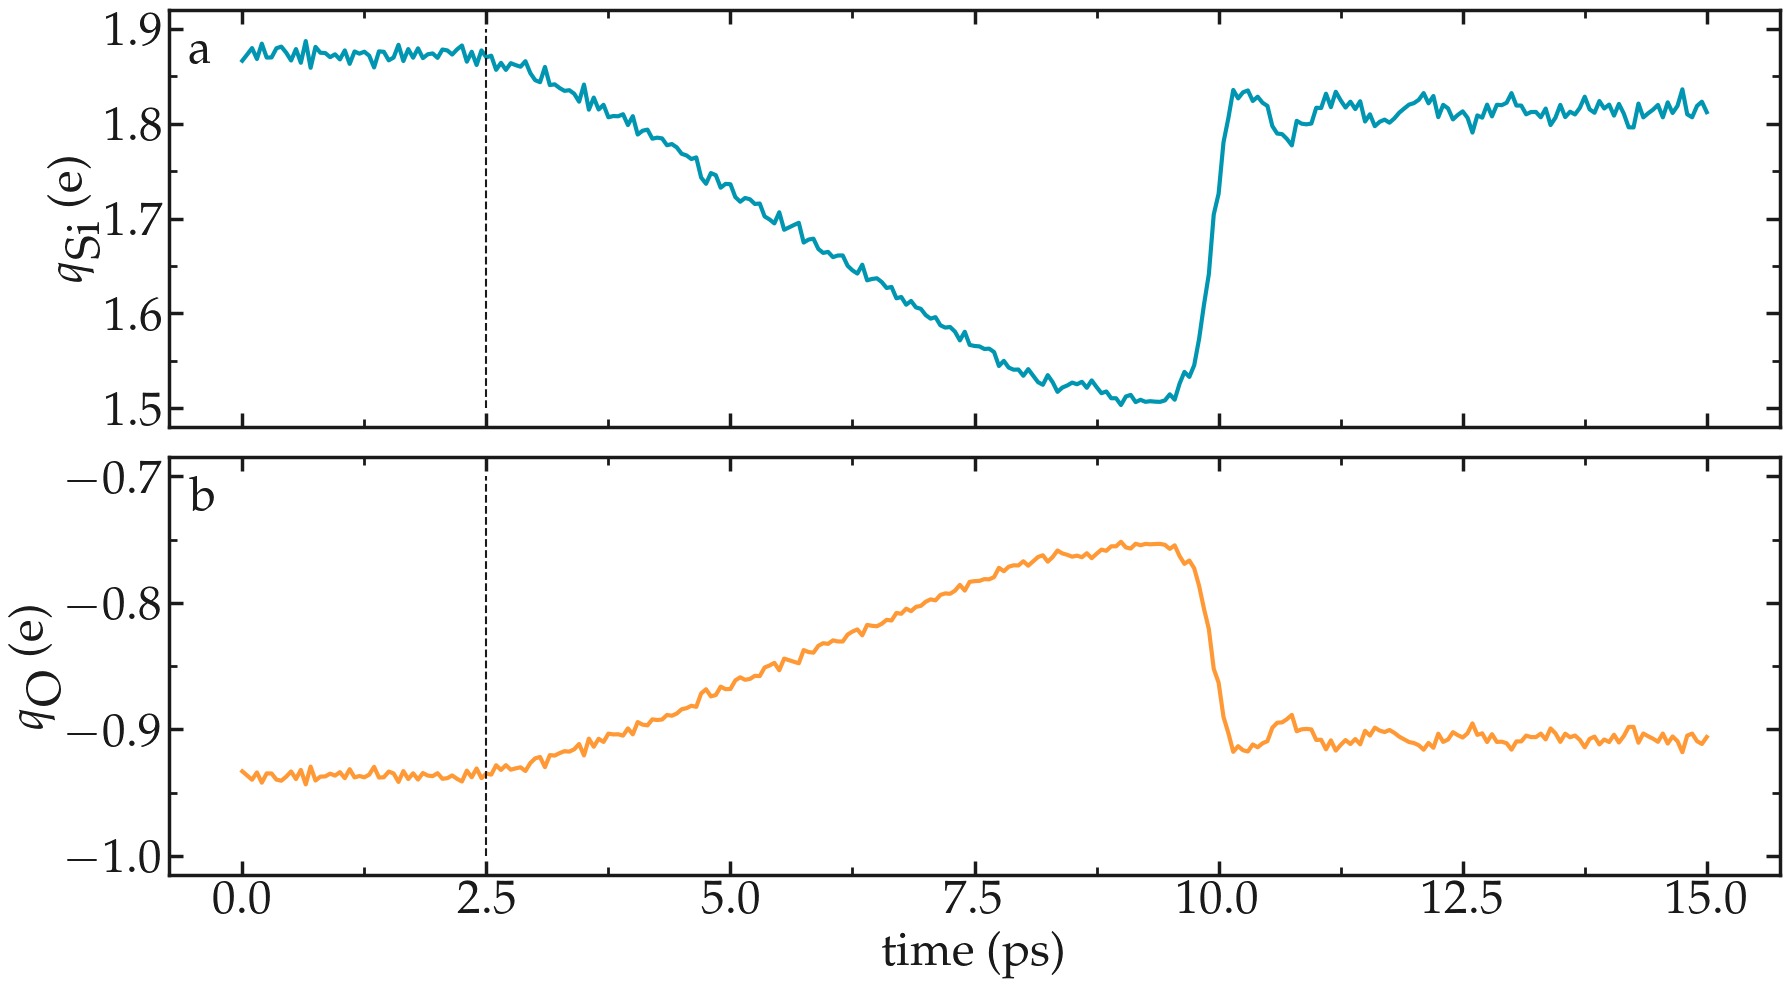

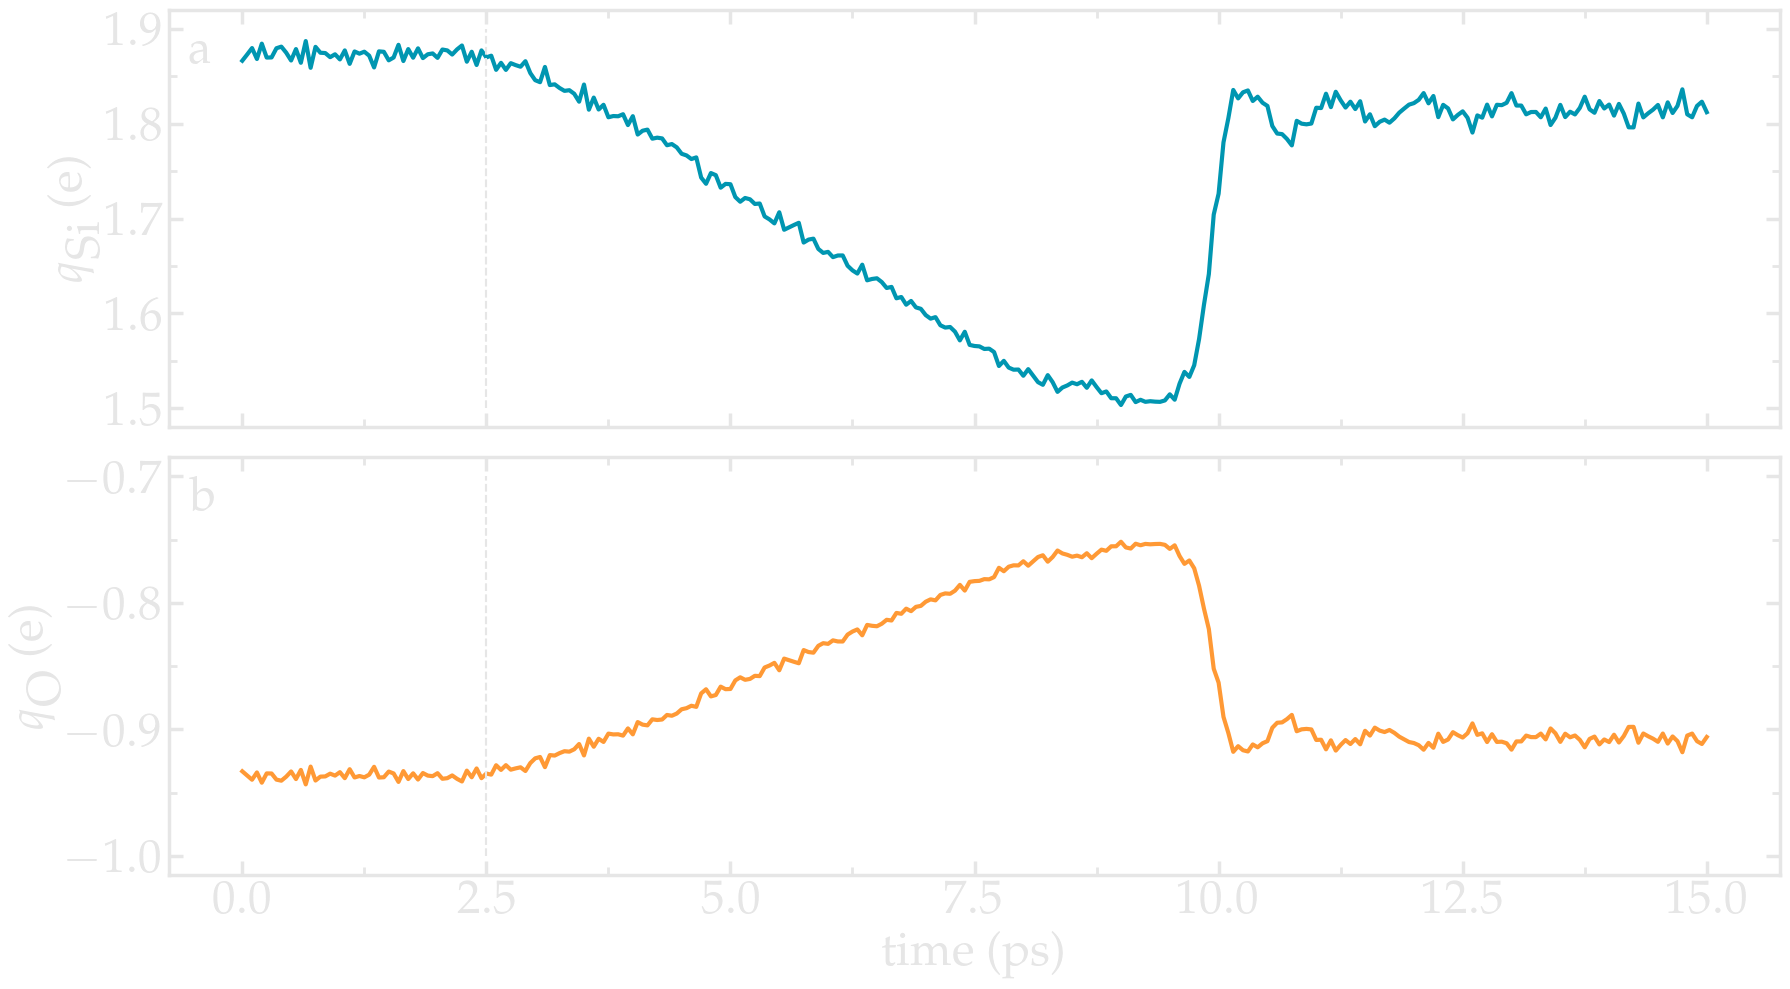

In [14]:
filename = "deformed-charge"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,10))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time/1000, qSi, color=colors["myblue"], linewidth=3)
    complete_panel(ax[-1], None, r'$q_\textrm{Si}$ (e)', legend=False, axis_color=mygray)
    x = np.linspace(1.5, 1.9)
    ax[-1].plot(x*0+2.5, x, '--', color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 16, 2.5), y_ticks=np.arange(1.5, 2, 0.1))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(time/1000, qO, color=colors["myorange"], linewidth=3)
    complete_panel(ax[-1], r'time (ps)', r'$q_\textrm{O}$ (e)', legend=False, axis_color=mygray)
    x = np.linspace(-1, -0.7)
    ax[-1].plot(x*0+2.5, x, '--', color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 16, 2.5), y_ticks=np.arange(-1, -0.7, 0.1))
    add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

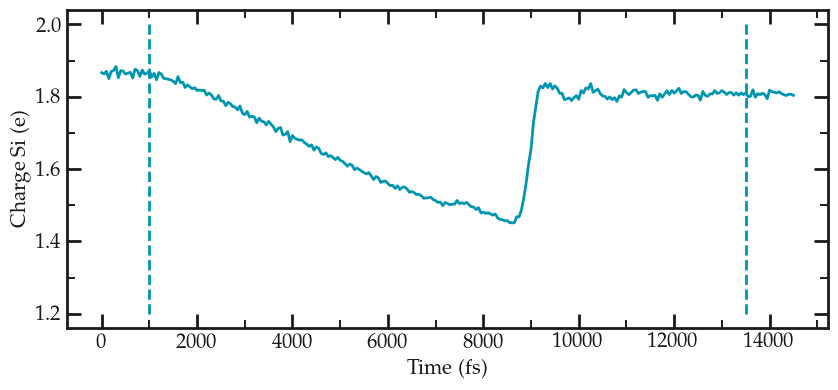

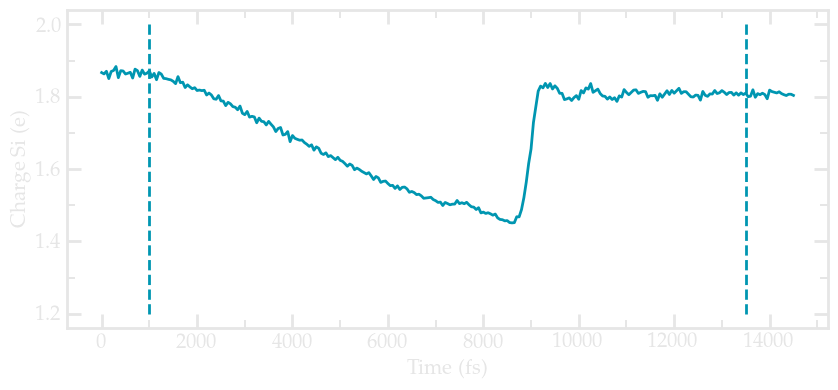

In [13]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):

    fig = plt.figure(figsize=(24, 4))
    ax1 = fig.add_subplot(131)
    plt.plot(step/2, qSi, linewidth = 2, color=myblue)
    x = np.array([1.2, 2])
    plt.plot(x*0+1000, x, '--', linewidth = 2, color=myblue)
    plt.plot(x*0+13500, x, '--', linewidth = 2, color=myblue)
    divider = make_axes_locatable(ax1)
    ax1.set_xlabel(r'Time (fs)', fontdict=font)
    ax1.set_ylabel(r'Charge Si (e)', fontdict=font)

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    #plt.ylim(5, 65)
    ax1.minorticks_on()
    ax1.tick_params('both', length=10, width=2, which='major', direction='in')
    ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
    ax1.xaxis.set_ticks_position('both')
    ax1.yaxis.set_ticks_position('both')
    ax1.spines["top"].set_linewidth(2)
    ax1.spines["bottom"].set_linewidth(2)
    ax1.spines["left"].set_linewidth(2)
    ax1.spines["right"].set_linewidth(2)
    ax1.set_xticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000])
    ax1.set_yticks([1.2, 1.4, 1.6, 1.8, 2])
    minor_locator_y = AutoMinorLocator(2)
    ax1.yaxis.set_minor_locator(minor_locator_y)
    minor_locator_x = AutoMinorLocator(2)
    ax1.xaxis.set_minor_locator(minor_locator_x)
    ax1.xaxis.label.set_color(mygray)
    ax1.yaxis.label.set_color(mygray)
    ax1.tick_params(axis='x', colors=mygray)
    ax1.tick_params(axis='y', colors=mygray)
    ax1.spines['left'].set_color(mygray)
    ax1.spines['top'].set_color(mygray)
    ax1.spines['bottom'].set_color(mygray)
    ax1.spines['right'].set_color(mygray)
    ax1.tick_params(axis='y', which='both', colors=mygray)
    ax1.tick_params(axis='x', which='both', colors=mygray)

    fig.tight_layout()
    if mode == 'light':
        pass
        plt.savefig('../../../../../docs/sphinx/source/tutorials/figures/reactive-silicon-dioxide/deformed-charge-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
    else:
        pass
        plt.savefig('../../../../../docs/sphinx/source/tutorials/figures/reactive-silicon-dioxide/deformed-charge-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)        
    plt.show()